# Image Classification


In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
device = "cuda" if torch.cuda.is_available() else "gpu"
device

'cuda'

In [3]:
samples = 1000


X,y = make_circles(samples, noise = 0.03)
len(X),len(y)

(1000, 1000)

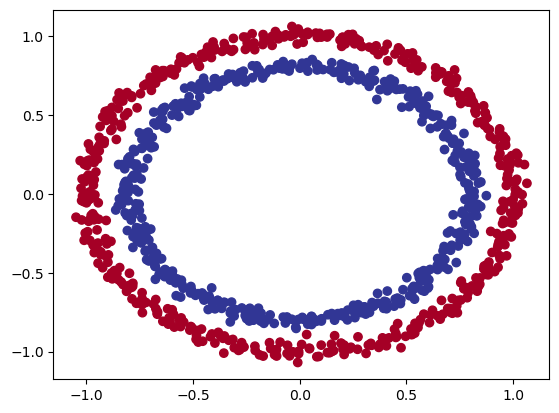

In [4]:
# Visualize function
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [5]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,5)
        self.layer_2 = nn.Linear(5,1)
        
    def forward(self, x)->torch.Tensor:
        return self.layer_2(self.layer_1(X))
    
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [7]:
model_0 = nn.Sequential(nn.Linear(2,5),
                         nn.Linear(5,1)).to(device)


In [8]:
# Loss Function and Optimizer 

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

In [9]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

# Training loop

In [10]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4542],
        [-0.3797],
        [-0.3924],
        [-0.3080],
        [-0.1494]], device='cuda:0')

In [11]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3884],
        [0.4062],
        [0.4032],
        [0.4236],
        [0.4627]], device='cuda:0')

In [12]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [13]:
eopchs = 1000

# Move device
X_train = X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(eopchs):
    
    model_0.train()
    
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss =loss_fn(y_logits,y_train)
    
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2} | Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}")
    

Epoch: 0 | Loss: 0.70152, Acc: 4.8e+01 | Test loss: 0.69913, Test accuracy: 49.50
Epoch: 10 | Loss: 0.70104, Acc: 4.9e+01 | Test loss: 0.69877, Test accuracy: 49.00
Epoch: 20 | Loss: 0.70060, Acc: 4.9e+01 | Test loss: 0.69845, Test accuracy: 48.50
Epoch: 30 | Loss: 0.70019, Acc: 4.9e+01 | Test loss: 0.69815, Test accuracy: 48.50
Epoch: 40 | Loss: 0.69982, Acc: 4.9e+01 | Test loss: 0.69788, Test accuracy: 49.00
Epoch: 50 | Loss: 0.69948, Acc: 5e+01 | Test loss: 0.69763, Test accuracy: 48.50
Epoch: 60 | Loss: 0.69916, Acc: 4.9e+01 | Test loss: 0.69741, Test accuracy: 48.50
Epoch: 70 | Loss: 0.69887, Acc: 4.9e+01 | Test loss: 0.69720, Test accuracy: 48.50
Epoch: 80 | Loss: 0.69859, Acc: 4.8e+01 | Test loss: 0.69701, Test accuracy: 48.50
Epoch: 90 | Loss: 0.69834, Acc: 4.9e+01 | Test loss: 0.69684, Test accuracy: 49.00
Epoch: 100 | Loss: 0.69811, Acc: 4.9e+01 | Test loss: 0.69668, Test accuracy: 49.50
Epoch: 110 | Loss: 0.69789, Acc: 4.8e+01 | Test loss: 0.69654, Test accuracy: 49.50
Epoch